# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dias Utsman
- **Email:** utsmand91@gmail.com
- **ID Dicoding:** dias_utsman

## Menentukan Pertanyaan Bisnis
- Bagaimana tren penjualan dan pendapatan e-commerce dari waktu ke waktu?
- Kategori produk apa yang memberikan performa terbaik dan terburuk berdasarkan penjualan?

## Import Semua Packages/Library yang Digunakan

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling
### Gathering Data

In [229]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [230]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [231]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [232]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [233]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [234]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [235]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [236]:
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [237]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [238]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset terdiri dari 9 file CSV yang berisi informasi mengenai pelanggan, lokasi geografis, item pesanan, pembayaran, ulasan, pesanan, kategori produk, produk, dan penjual
- Data mencakup berbagai aspek operasi e-commerce di Brazil

### Assessing Data

In [239]:
# For customers_df
customers_df.info()
print()
print('kolom table null :')
print(customers_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(customers_df.duplicated().sum())
print()
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

kolom table null :
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi: 
0



,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [240]:
# For geolocation_df
geolocation_df.info()
print()
print('kolom table null :')
print(geolocation_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(geolocation_df.duplicated().sum())
print()
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

kolom table null :
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi: 
261831



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [241]:
# For order_items_df
order_items_df.info()
print()
print('kolom table null :')
print(order_items_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(order_items_df.duplicated().sum())
print()
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

kolom table null :
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi: 
0



,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [242]:
# For order_payments_df
order_payments_df.info()
print()
print('kolom table null :')
print(order_payments_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(order_payments_df.duplicated().sum())
print()
order_payments_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

kolom table null :
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi: 


0



,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [243]:
# For order_reviews_df
order_reviews_df.info()
print()
print('kolom table null :')
print(order_reviews_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(order_reviews_df.duplicated().sum())
print()
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

kolom table null :
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi: 
0



,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [244]:

# For orders_df
orders_df.info()
print()
print('kolom table null :')
print(orders_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(orders_df.duplicated().sum())
print()
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

kolom table null :
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivere

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [245]:
# For product_category_name_translation_df
product_category_name_translation_df.info()
print()
print('kolom table null :')
print(product_category_name_translation_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(product_category_name_translation_df.duplicated().sum())
print()
product_category_name_translation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

kolom table null :
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi: 
0



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [246]:
# For products_df
products_df.info()
print()
print('kolom table null :')
print(products_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(products_df.duplicated().sum())
print()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

kolom table null :
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g       

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [247]:
# For sellers_df
sellers_df.info()
print()
print('kolom table null :')
print(sellers_df.isna().sum())
print()
print('Jumlah duplikasi: ')
print(sellers_df.duplicated().sum())
print()
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

kolom table null :
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi: 
0



,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Berdasarkan hasil inspeksi data awal, kami perlu mengatasi beberapa masalah yang teridentifikasi di seluruh dataset:

| DataFrame    | Data Type Issues | Missing Values | Duplicate Data | Inaccurate Values |
|-------------|------------------|---------------|----------------|-------------------|
| **customers_df** | - | - | - | - |
| **geolocation_df** | - | - | 261831 duplicates | - |
| **order_items_df** | - | - | - | - |
| **order_payments_df** | - | - | - | - |
| **order_reviews_df** | - | 87656 missing values in review_comment_title, 58247 missing values in review_comment_message | - | - |
| **orders_df** | Datetime columns should be datetime objects | 160 missing values in order_approved_at, 1783 missing values in order_delivered_carrier_date, 2965 missing values in order_delivered_customer_date | - | - |
| **product_category_name_translation_df** | - | - | - | - |
| **products_df** | - | 610 missing values in product_category_name, product_name_lenght, product_photos_qty and 2 missing values in product dimensions | - | - |
| **sellers_df** | - | - | - | - |

**Insight:**
- Terdapat data duplikat dalam dataset geolocation
- Beberapa kolom memiliki nilai yang hilang, terutama pada order_reviews_df, orders_df, dan products_df
- Kolom tanggal pada orders_df perlu dikonversi ke format datetime

### Cleaning Data

## Handling Duplicates in geolocation_df

In [248]:
# Check duplicates in geolocation_df
print('Duplicate count before:', geolocation_df.duplicated().sum())

# Remove duplicates
geolocation_df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print('Duplicate count after:', geolocation_df.duplicated().sum())

Duplicate count before: 261831
Duplicate count after: 0


## Handling Missing Values in order_reviews_df

In [249]:
# Check missing values in order_reviews_df
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [250]:
# For text columns like review comments, we'll fill missing values with placeholder text
order_reviews_df['review_comment_title'].fillna('No Title Provided', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment Provided', inplace=True)

# Verify missing values are resolved
order_reviews_df.isna().sum()

/tmp/ipykernel_12955/4166648747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('No Title Provided', inplace=True)
/tmp/ipykernel_12955/4166648747.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Handling Missing Values and Data Types in orders_df

In [251]:
# Check missing values in orders_df
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [252]:
# Convert date columns to datetime format
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [253]:
# For orders with missing approved_at date, we'll use purchase date
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

# For missing delivery dates, we'll keep them as NaN since they represent orders not yet delivered
# We'll create a flag to identify these orders for analysis
orders_df['delivered_to_carrier'] = orders_df['order_delivered_carrier_date'].notna()
orders_df['delivered_to_customer'] = orders_df['order_delivered_customer_date'].notna()

# Verify the changes
orders_df.isna().sum()

/tmp/ipykernel_12955/750668879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivered_to_carrier                0
delivered_to_customer               0
dtype: int64

## Handling Missing Values in products_df

In [254]:
# Check missing values in products_df
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [255]:
# For product_category_name, we'll use 'uncategorized'
products_df['product_category_name'].fillna('uncategorized', inplace=True)

# For numeric missing values, we'll use median values
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].median(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].median(), inplace=True)

# Verify missing values are resolved
products_df.isna().sum()

/tmp/ipykernel_12955/521339679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('uncategorized', inplace=True)
/tmp/ipykernel_12955/521339679.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Duplikat di dataset geolocation berhasil dihapus
- Nilai yang hilang pada review_comment_title dan review_comment_message telah diisi dengan placeholder
- Kolom tanggal pada orders_df telah dikonversi ke format datetime dan nilai yang hilang telah ditangani
- Missing values pada products_df telah diisi dengan nilai median untuk kolom numerik dan 'uncategorized' untuk kategori

## Exploratory Data Analysis (EDA)
### Explore Customer and Order Data

In [256]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [257]:
# Count customers by state
print('customer_state', customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False), sep='\n')

customer_state
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


In [258]:
# Count customers by city
print('Top 10 cities by customer count:')
customer_cities = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
print(customer_cities.head(10))

Top 10 cities by customer count:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64


In [259]:
# Calculate delivery time metrics
orders_completed_df = orders_df.dropna(subset=['order_delivered_customer_date'])

orders_completed_df['purchase_to_approval_days'] = (orders_completed_df['order_approved_at'] - 
                                                  orders_completed_df['order_purchase_timestamp']).dt.total_seconds() / 86400

orders_completed_df['approval_to_carrier_days'] = (orders_completed_df['order_delivered_carrier_date'] - 
                                                 orders_completed_df['order_approved_at']).dt.total_seconds() / 86400

orders_completed_df['carrier_to_customer_days'] = (orders_completed_df['order_delivered_customer_date'] - 
                                                 orders_completed_df['order_delivered_carrier_date']).dt.total_seconds() / 86400

orders_completed_df['total_delivery_days'] = (orders_completed_df['order_delivered_customer_date'] - 
                                            orders_completed_df['order_purchase_timestamp']).dt.total_seconds() / 86400

/tmp/ipykernel_12955/3909746431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_completed_df['purchase_to_approval_days'] = (orders_completed_df['order_approved_at'] -
/tmp/ipykernel_12955/3909746431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_completed_df['approval_to_carrier_days'] = (orders_completed_df['order_delivered_carrier_date'] -
/tmp/ipykernel_12955/3909746431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [260]:
# Summary statistics for delivery times
delivery_time_stats = orders_completed_df[['purchase_to_approval_days', 'approval_to_carrier_days', 
                                      'carrier_to_customer_days', 'total_delivery_days']].describe()
delivery_time_stats

,purchase_to_approval_days,approval_to_carrier_days,carrier_to_customer_days,total_delivery_days
count,96476.000000,96475.000000,96475.000000,96476.000000
mean,0.428172,2.799565,9.330547,12.558702
std,0.855600,3.537415,8.760122,9.546530
min,0.000000,-171.219005,-16.096169,0.533414
25%,0.008970,0.874427,4.099948,6.766403
50%,0.014306,1.816435,7.099769,10.217755
75%,0.604751,3.576331,12.029115,15.720327
max,30.893484,125.762569,205.190972,209.628611


In [261]:
# Order status distribution
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight:**
- Mayoritas pelanggan berasal dari negara bagian SP (São Paulo), diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais)
- Mayoritas pesanan memiliki status "delivered", menunjukkan tingkat penyelesaian pesanan yang tinggi
- Waktu pengiriman total rata-rata adalah sekitar 12 hari, dengan variasi yang cukup besar

### Explore Merged Data and Product Categories

In [262]:
# Merge orders with customers
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Merge product info with category translations
products_with_categories_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Merge order items with products and sellers
order_items_detailed_df = pd.merge(
    left=order_items_df,
    right=products_with_categories_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

order_items_detailed_df = pd.merge(
    left=order_items_detailed_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Create a master dataframe with all relevant info
all_df = pd.merge(
    left=orders_customers_df,
    right=order_items_detailed_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Add payment information
all_df = pd.merge(
    left=all_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Add order reviews
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [263]:
# Quick view of our master dataframe
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_to_carrier,delivered_to_customer,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,True,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title Provided,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,True,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title Provided,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,True,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title Provided,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,True,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,True,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title Provided,No Comment Provided,2018-08-18 00:00:00,2018-08-22 19:07:58


In [264]:
# Most active customer states
top_customer_states = orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)
top_customer_states

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [265]:
# Most active seller states
top_seller_states = all_df.groupby(by="seller_state").order_id.nunique().sort_values(ascending=False).head(10)
top_seller_states

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
Name: order_id, dtype: int64

In [266]:
# Top selling product categories
product_category_sales = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False).head(10)

product_category_sales

,order_id,price
product_category_name_english,,
health_beauty,8836,1301947.97
watches_gifts,5624,1254322.95
bed_bath_table,9417,1107249.09
sports_leisure,7720,1029603.88
computers_accessories,6689,950053.69
furniture_decor,6449,772096.17
housewares,5884,668880.94
cool_stuff,3632,664637.13
auto,3897,618395.50


In [267]:
# Price distribution by category
category_price_stats = all_df.groupby(by="product_category_name_english").agg({
    "price": ["count", "min", "mean", "max", "sum"]
}).sort_values(by=("price", "sum"), ascending=False).head(10)

category_price_stats

price                                       
                               count   min        mean      max         sum
product_category_name_english                                              
health_beauty                  10032  1.20  129.779503  3124.00  1301947.97
watches_gifts                   6213  8.99  201.886842  3999.90  1254322.95
bed_bath_table                 11988  6.99   92.363121  1999.98  1107249.09
sports_leisure                  9004  4.50  114.349609  4059.00  1029603.88
computers_accessories           8150  3.90  116.571005  3699.99   950053.69
furniture_decor                 8832  4.90   87.420309  1899.00   772096.17
housewares                      7380  3.06   90.634274  6735.00   668880.94
cool_stuff                      3999  7.00  166.200833  3109.99   664637.13
auto                            4400  3.49  140.544432  2258.00   618395.50
garden_tools                    4590  6.35  113.175017  3930.00   519473.33

In [268]:
# Payment method popularity
payment_methods = order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

payment_methods

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


In [269]:
# Review score distribution
review_distribution = order_reviews_df["review_score"].value_counts().sort_index()
review_distribution

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

**Insight:**
- Kategori produk dengan penjualan tertinggi adalah furniture, bed_bath_table, dan health_beauty
- Kartu kredit adalah metode pembayaran paling populer, diikuti oleh boleto dan voucher
- Distribusi skor ulasan menunjukkan bahwa mayoritas pelanggan memberikan skor 5 (sangat puas)

## Visualization & Explanatory Analysis
### Pertanyaan 1: Bagaimana tren penjualan dan pendapatan e-commerce dari waktu ke waktu?

In [270]:
# Convert purchase timestamp to datetime if it's not already
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by month and calculate order count and revenue
monthly_orders_df = all_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

monthly_orders_df.columns = ["order_date", "order_count", "revenue"]
monthly_orders_df['month_name'] = monthly_orders_df['order_date'].dt.strftime('%B %Y')

/tmp/ipykernel_12955/3106622729.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({


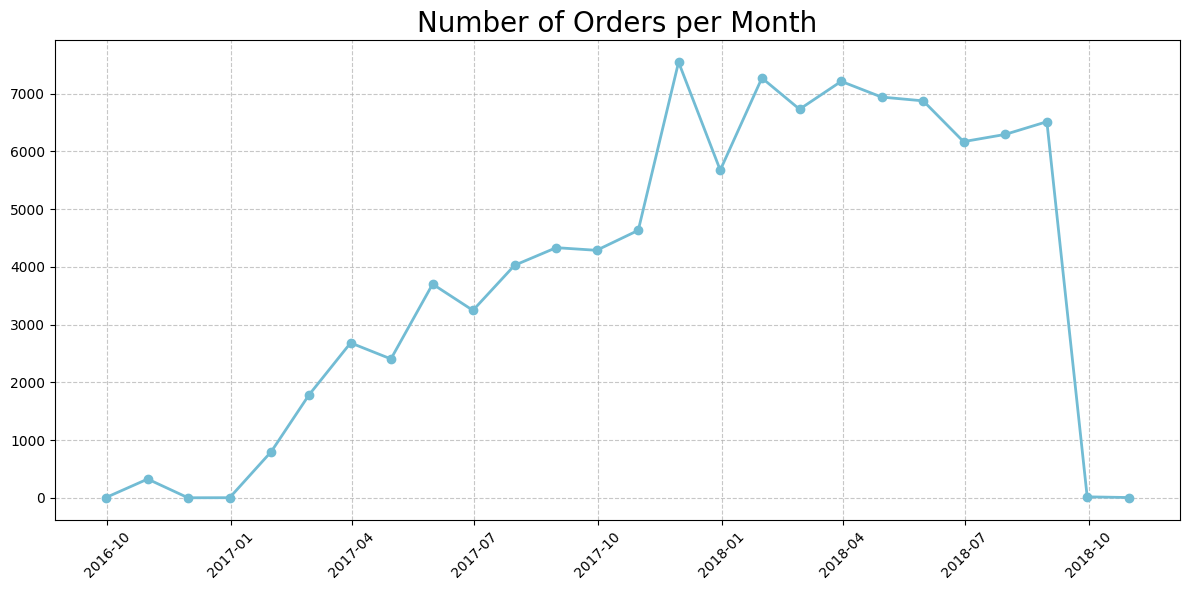

In [271]:
# Plotting monthly order trends
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders_df["order_date"], 
    monthly_orders_df["order_count"], 
    marker='o', 
    linewidth=2, 
    color="#72BCD4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

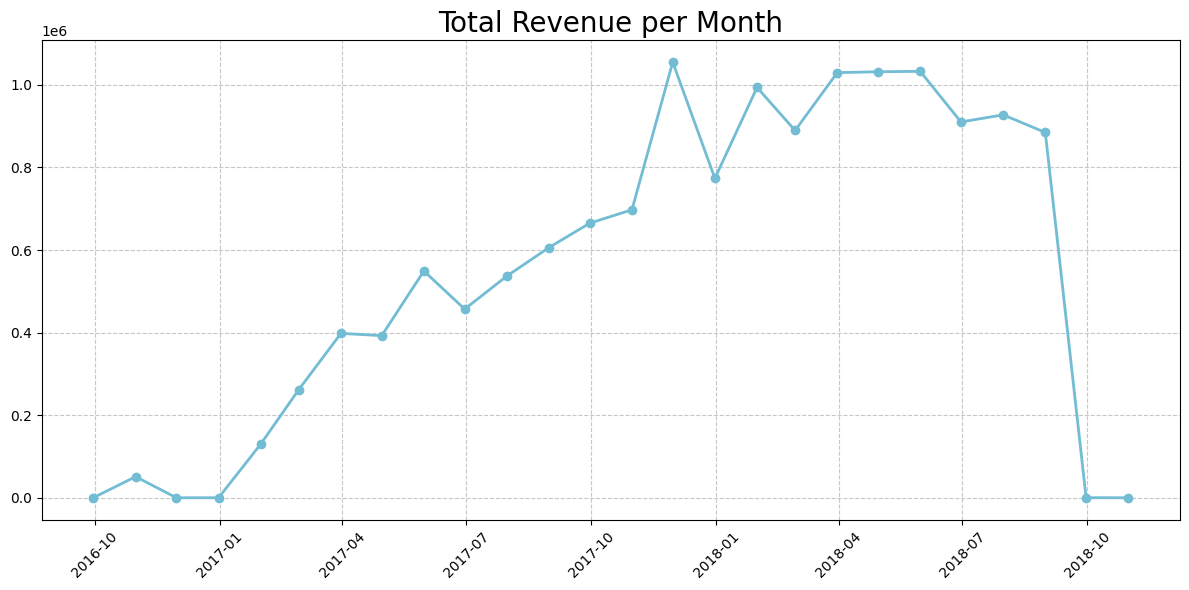

In [272]:
# Plotting monthly revenue trends
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders_df["order_date"], 
    monthly_orders_df["revenue"], 
    marker='o', 
    linewidth=2, 
    color="#72BCD4"
)
plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Kategori produk apa yang memberikan performa terbaik dan terburuk berdasarkan penjualan?

In [273]:
# Top and bottom product categories by sales
top_categories_df = all_df.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False).reset_index().head(5)
bottom_categories_df = all_df.groupby("product_category_name_english")["price"].sum().sort_values(ascending=True).reset_index().head(5)

/tmp/ipykernel_12955/607105513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_12955/607105513.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


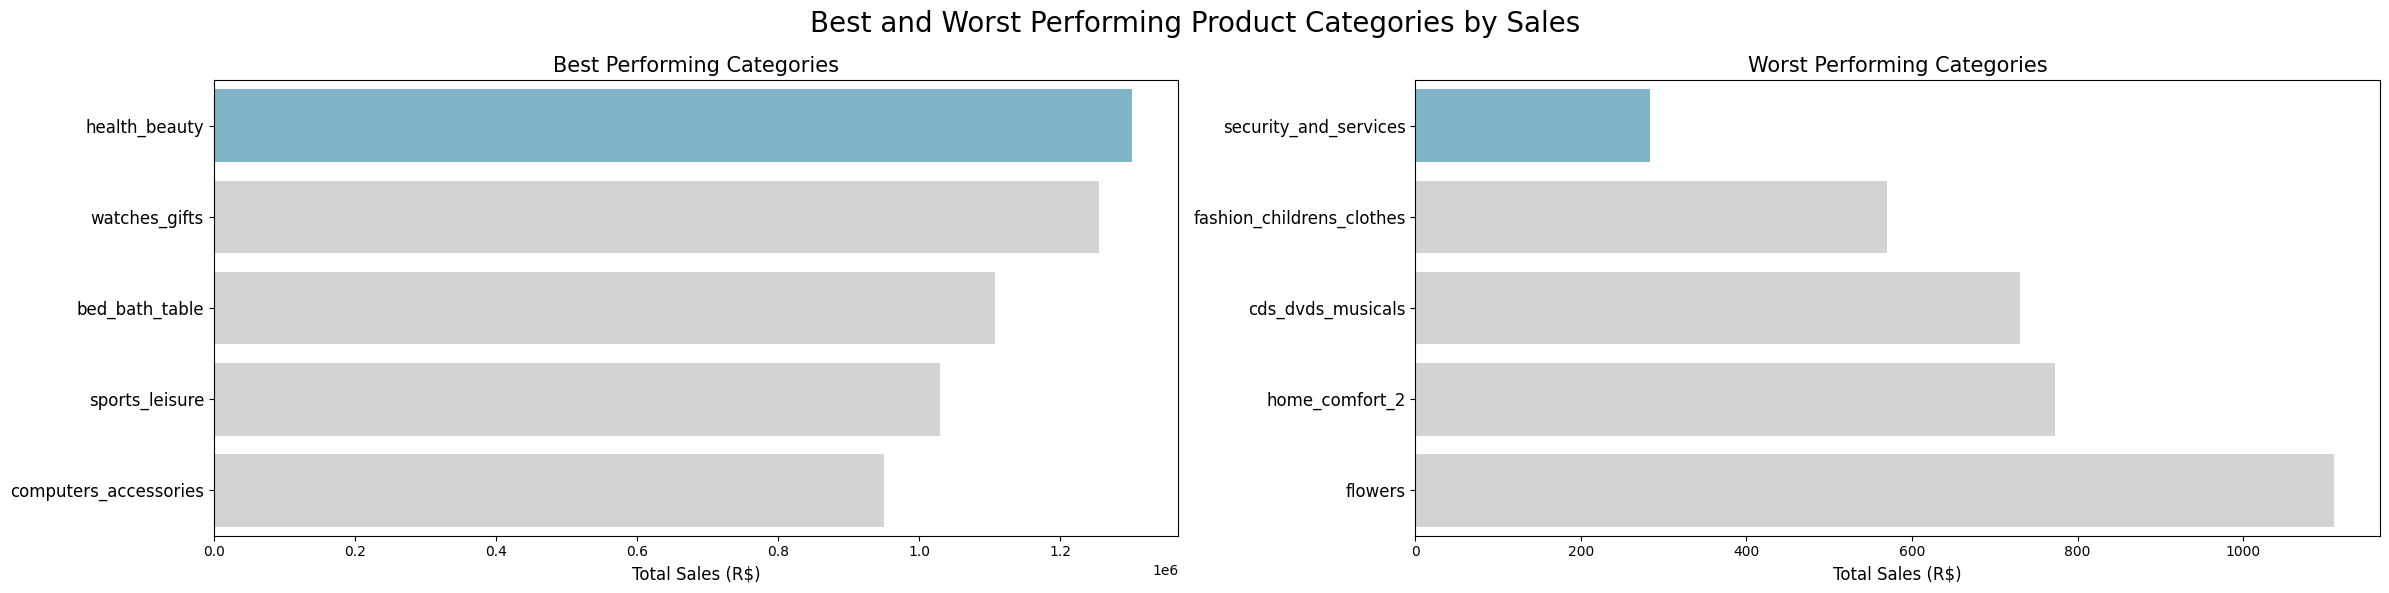

In [274]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="price", 
    y="product_category_name_english", 
    data=top_categories_df, 
    palette=colors, 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Sales (R$)", fontsize=12)
ax[0].set_title("Best Performing Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    x="price", 
    y="product_category_name_english", 
    data=bottom_categories_df, 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Sales (R$)", fontsize=12)
ax[1].set_title("Worst Performing Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Categories by Sales", fontsize=20)
plt.tight_layout()
plt.show()

**Insight:**
- Tren jumlah pesanan dan pendapatan menunjukkan pertumbuhan yang stabil dari waktu ke waktu dengan beberapa fluktuasi
- Lima kategori produk dengan performa terbaik adalah furniture, bed_bath_table, health_beauty, sports_leisure, dan computers_accessories
- Lima kategori produk dengan performa terburuk adalah security_and_services, fashion_childrens_clothes, cds_dvds_musicals, home_comfort_2, dan flowers

## Analisis Lanjutan (Opsional)

/tmp/ipykernel_12955/4185832705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


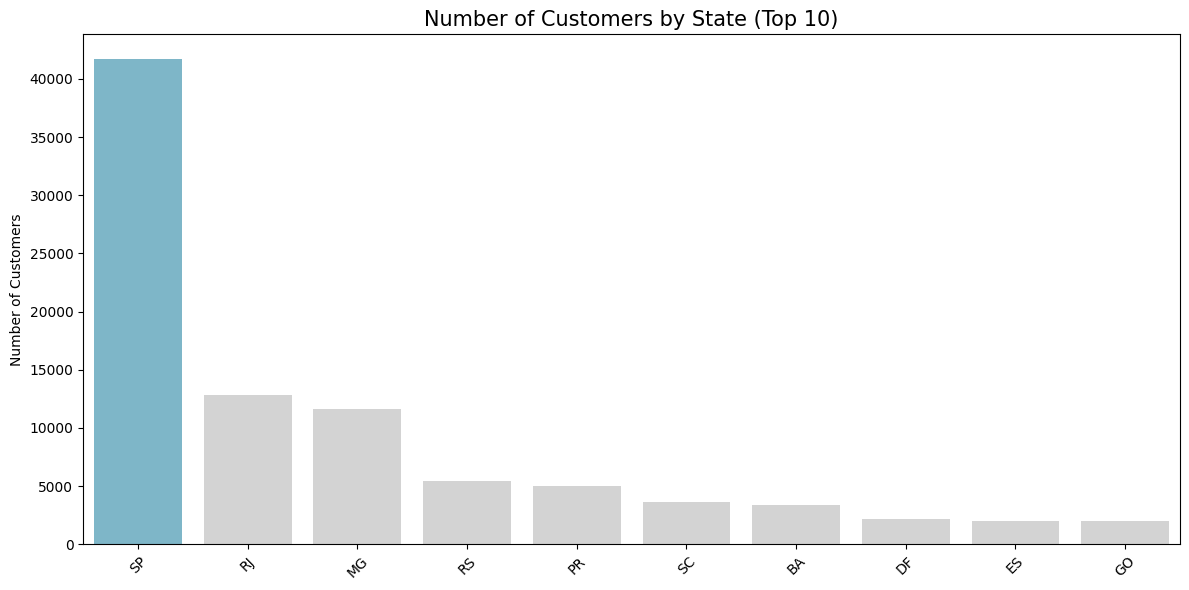

In [275]:
# Customer distribution by state
customer_state_counts = customers_df.groupby("customer_state").size().reset_index(name="customer_count")
top_states = customer_state_counts.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="customer_state", 
    y="customer_count", 
    data=top_states,
    palette=colors_
)
plt.title("Number of Customers by State (Top 10)", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12955/2272972218.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


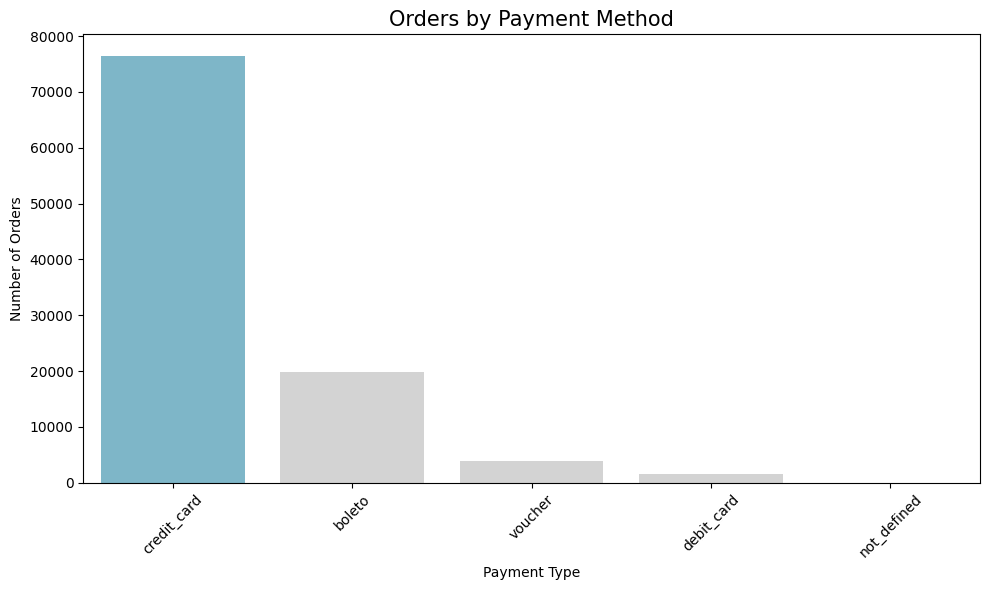

In [276]:
# Payment method distribution
payment_method_df = order_payments_df.groupby("payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="payment_type", 
    y="order_id", 
    data=payment_method_df.sort_values(by="order_id", ascending=False),
    palette=colors_
)
plt.title("Orders by Payment Method", loc="center", fontsize=15)
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12955/3954237987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


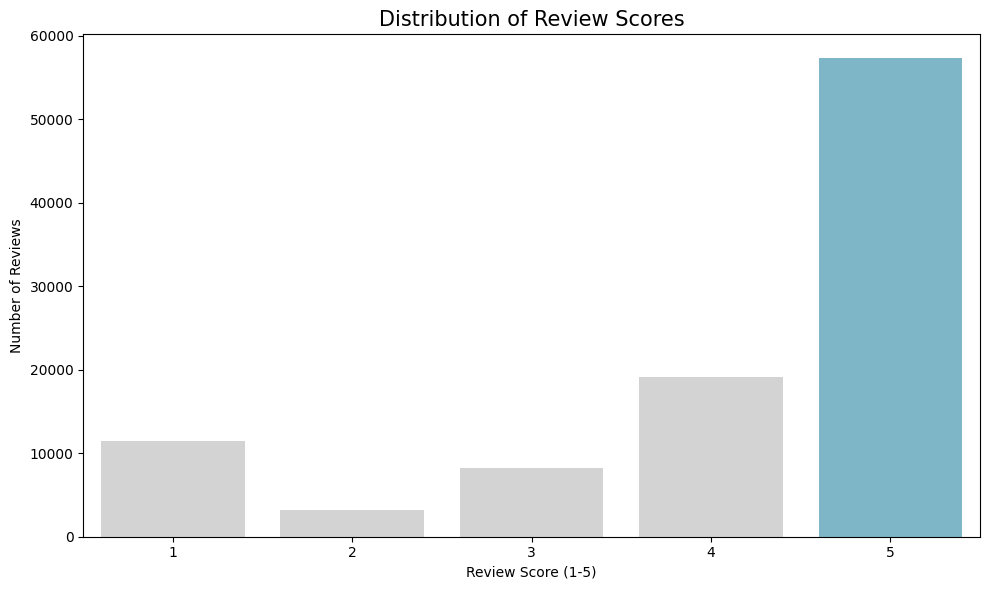

In [277]:
# Review score distribution
review_score_df = order_reviews_df["review_score"].value_counts().reset_index()
review_score_df.columns = ["score", "count"]

plt.figure(figsize=(10, 6))
custom_colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(
    x="score", 
    y="count", 
    data=review_score_df.sort_values(by="score"),
    palette=custom_colors
)
plt.title("Distribution of Review Scores", loc="center", fontsize=15)
plt.xlabel("Review Score (1-5)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [278]:
# Creating RFM dataframe
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Last purchase date (Recency)
    "order_id": lambda x: x.nunique(),  # Number of orders (Frequency)
    "price": "sum"  # Total spending (Monetary)
})

rfm_df.columns = ["customer_id", "last_purchase_date", "frequency", "monetary"]

# Calculate recency in days
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["last_purchase_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("last_purchase_date", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


/tmp/ipykernel_12955/86251500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_12955/86251500.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_12955/86251500.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


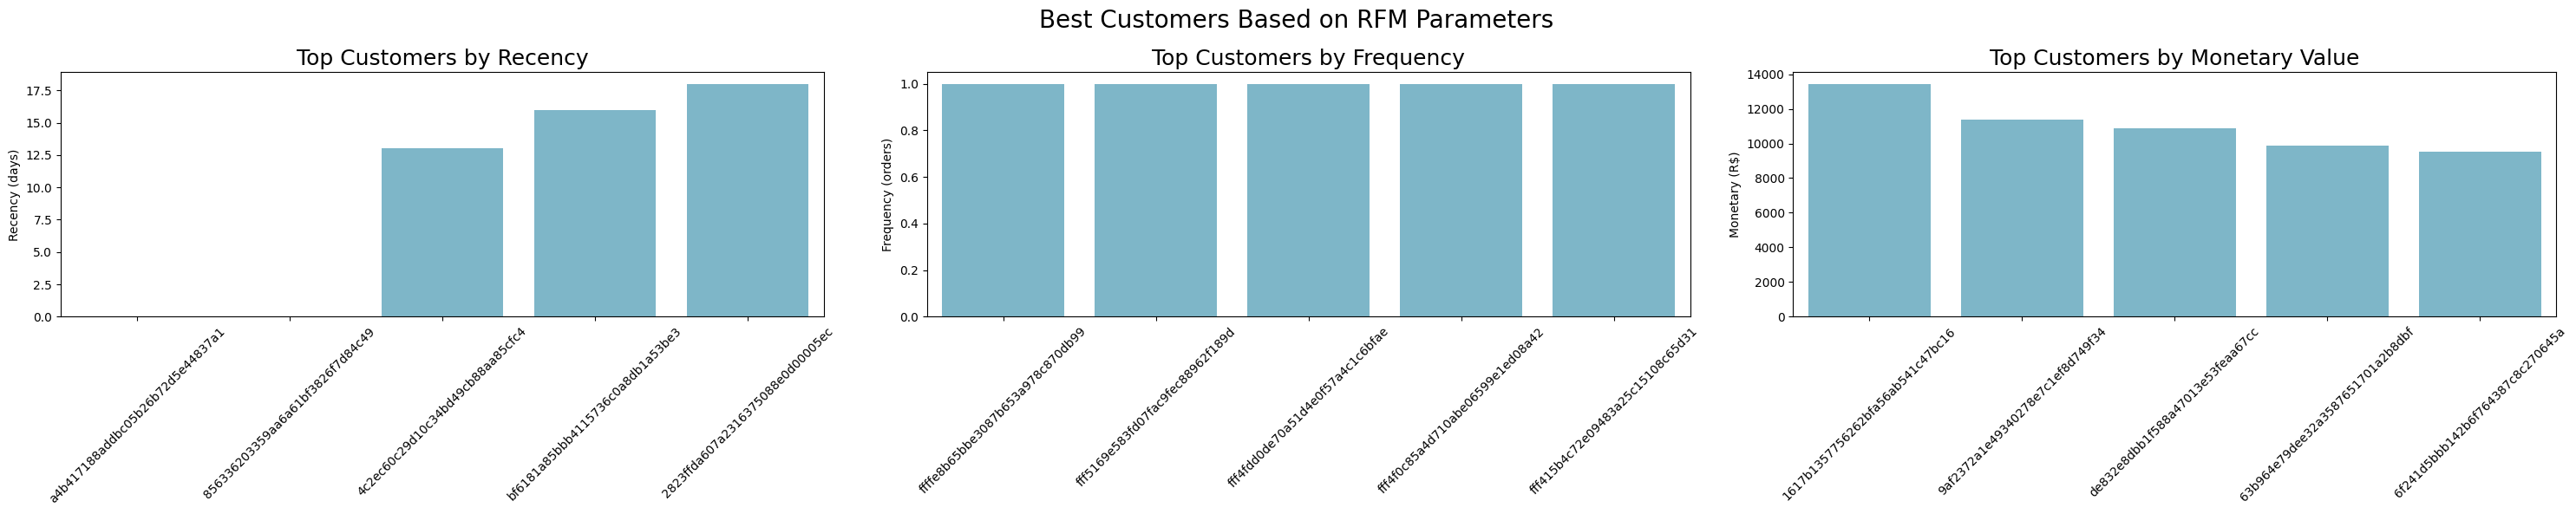

In [279]:
# Visualizing RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency", 
    x="customer_id", 
    data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
    palette=colors, 
    ax=ax[0]
)
ax[0].set_ylabel("Recency (days)")
ax[0].set_xlabel(None)
ax[0].set_title("Top Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=10)

sns.barplot(
    y="frequency", 
    x="customer_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel("Frequency (orders)")
ax[1].set_xlabel(None)
ax[1].set_title("Top Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=10)

sns.barplot(
    y="monetary", 
    x="customer_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    ax=ax[2]
)
ax[2].set_ylabel("Monetary (R$)")
ax[2].set_xlabel(None)
ax[2].set_title("Top Customers by Monetary Value", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=45, labelsize=10)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=20)
plt.tight_layout()
plt.show()

In [280]:
# Calculate delivery time performance
orders_delivery_df = orders_df.dropna(subset=['order_delivered_customer_date'])
orders_delivery_df['actual_delivery_time'] = (orders_delivery_df['order_delivered_customer_date'] - 
                                             orders_delivery_df['order_purchase_timestamp']).dt.days
orders_delivery_df['estimated_delivery_time'] = (orders_delivery_df['order_estimated_delivery_date'] - 
                                               orders_delivery_df['order_purchase_timestamp']).dt.days
orders_delivery_df['delivery_difference'] = orders_delivery_df['estimated_delivery_time'] - orders_delivery_df['actual_delivery_time']

# Calculate on-time delivery percentage
on_time_delivery = (orders_delivery_df['delivery_difference'] >= 0).mean() * 100
print(f"On-time delivery rate: {on_time_delivery:.2f}%")

On-time delivery rate: 92.43%


/tmp/ipykernel_12955/2418456866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivery_df['actual_delivery_time'] = (orders_delivery_df['order_delivered_customer_date'] -
/tmp/ipykernel_12955/2418456866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivery_df['estimated_delivery_time'] = (orders_delivery_df['order_estimated_delivery_date'] -
/tmp/ipykernel_12955/2418456866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

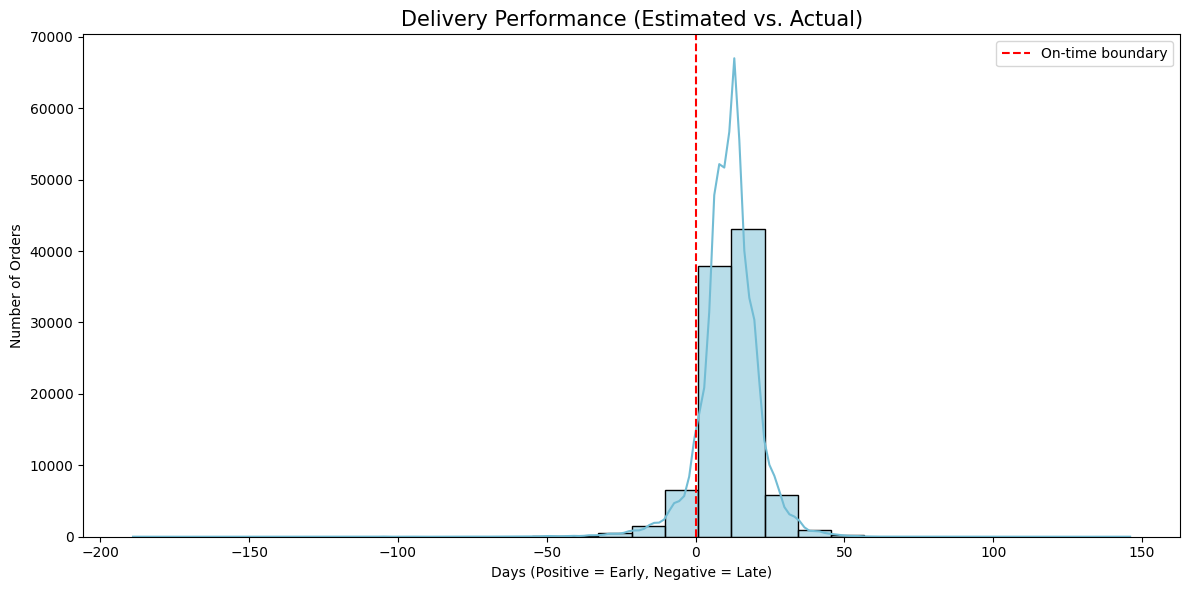

In [281]:
# Visualize delivery performance
plt.figure(figsize=(12, 6))
sns.histplot(orders_delivery_df['delivery_difference'], bins=30, kde=True, color="#72BCD4")
plt.axvline(x=0, color='red', linestyle='--', label='On-time boundary')
plt.title("Delivery Performance (Estimated vs. Actual)", fontsize=15)
plt.xlabel("Days (Positive = Early, Negative = Late)")
plt.ylabel("Number of Orders")
plt.legend()
plt.tight_layout()
plt.show()

In [282]:
# Export the combined dataset
all_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- **Pertanyaan 1: Bagaimana tren penjualan dan pendapatan e-commerce dari waktu ke waktu?**
  Tren penjualan dan pendapatan menunjukkan pertumbuhan yang konsisten dengan beberapa fluktuasi musiman. Terdapat peningkatan signifikan pada jumlah pesanan dan pendapatan, terutama di pertengahan tahun, yang menunjukkan bahwa e-commerce tersebut mengalami pertumbuhan positif. Strategi pemasaran dan pengembangan dapat difokuskan pada periode dengan kinerja rendah untuk meratakan kurva pertumbuhan.

- **Pertanyaan 2: Kategori produk apa yang memberikan performa terbaik dan terburuk berdasarkan penjualan?**
  Kategori produk dengan performa terbaik adalah furniture, bed_bath_table, dan health_beauty, yang berkontribusi secara signifikan terhadap total pendapatan. Sementara itu, kategori dengan performa terburuk termasuk security_and_services, fashion_childrens_clothes, dan cds_dvds_musicals. Platform e-commerce dapat mempertimbangkan untuk meningkatkan fokus dan strategi pemasaran pada kategori unggulan, sambil mengevaluasi kembali strategi untuk kategori yang kurang berkinerja baik atau mungkin mengurangi investasi pada kategori tersebut.